In [2]:
#coding=utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 引入数据

In [3]:
# 使用numpy引入数据集和测试集
sample_set = np.loadtxt('HTRU_2_train.csv',delimiter=',')
test_set = np.loadtxt('HTRU_2_test.csv',delimiter=',')

## 标准化函数的实现

In [4]:
"""
功能：0-1标准化
参数：数据集，数据集属性个数
返回值：标准化的数据集
"""
def standardization_set(arr,n):
    arr = np.rollaxis(arr,1) # 将传入的样本沿一轴翻滚，令同一属性在一个维度的数组中，方便计算
    
    for i in np.arange(n):
        att = arr[i]
        arr[i] = normalization(att)
        
    arr = np.rollaxis(arr,1) # 将0-1标准化处理后的样本沿一轴翻滚回去
    return arr



"""
功能：0-1标准化一个list
"""
def normalization(x):
    return [(float(i)-min(x))/float(max(x)-min(x)) for i in x]


## 将数据集0-1标准化处理

In [5]:
sample_set = standardization_set(sample_set,2)
test_set = standardization_set(test_set,2)

In [6]:
# 命名属性和类别
names = ['attr1','attr2','target']

# 利用pandas库加属性名处理数据，方便索引可视化
data = pd.DataFrame(sample_set,columns=names)

### 数据处理，可视化
   将数据集可视化处理，再切割为训练集和测试集

(1349, 3) (1303, 3)


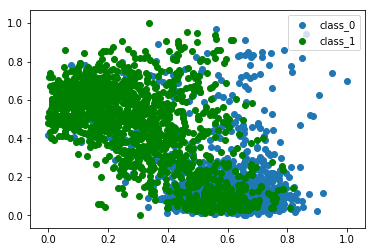

In [7]:
# 选择类别为0和1的数据作为class_0和class_1
class_0 = data.loc[data['target'] == 0]
class_1 = data.loc[data['target'] == 1]

print(np.shape(class_0),np.shape(class_1))
# 选择0类和1类的attr1和attr2作为x,y分别进行可视化
x_0 = class_0[['attr1','attr2']].values[:,0]
y_0 = class_0[['attr1','attr2']].values[:,1]
x_1 = class_1[['attr1','attr2']].values[:,0]
y_1 = class_1[['attr1','attr2']].values[:,1]


# 利用matplotlib做图
plt.scatter(x_0,y_0,label='class_0')
plt.scatter(x_1,y_1,c='g',label='class_1')
plt.legend()
plt.show()


#划分训练属性、训练标签
haha = sample_set
x_train, y_train = haha[:2000,:2],haha[:2000,2:3]


### 逻辑回归的函数实现

In [18]:
"""
功能：sigmoid函数的实现
"""
def sigmoid(h):
    return 1/(1 + np.exp(-h))
    

"""
功能：逻辑回归的梯度下降的实现
参数：训练集的属性值数组x(样本总行数,属性数+1)，类别值数组y(样本总行数,1)，指定的最大迭代次数(默认5000)，指定的学习率(默认0.01)
返回值：满足最大迭代次数或收敛的theta值
"""
def gradual_decent(X,Y,maxCycle=5000,alpha=0.001):
    X = set_stack(X)
    x, y = np.mat(X), np.mat(Y)
    m,n = np.shape(X)
    theta = np.ones((n,1))
    
    for i in np.arange(maxCycle):
        h = sigmoid(x * theta)
        j = (x.T * (h-y))/m
        theta = theta - alpha * j
    
    return np.array(theta)



"""
功能：根据选择的系数建立逻辑回归函数进行分类
参数：回归方程系数向量theta(属性值+1,1),参与预测的属性向量x(样本总行数,属性数+1)
返回值：逻辑回归预测类别(样本总行数,1)
"""
def logistic_regression(theta,X):
    X = set_stack(X)
    X, theta = np.mat(X), np.mat(theta)
    h = sigmoid(X * theta)
    m, n = np.shape(X)
    pre = []
    
    for p in h:
        if p > 0.5:
            pre.append(1)
        else:
            pre.append(0)
            
    return np.array(pre).reshape(m,1)

"""
正确率计算
"""
def accuracy_rate(predict,Y):
    m,n = np.shape(Y)
    p = np.concatenate(predict)
    y = np.concatenate(Y)
    
    num = 0 #分子
    dec = 0 # 分母
    
    for i in np.arange(m):
        dec += 1
        if p[i] == y[i]:
            num += 1
    
    return num/dec

"""
增加一列偏置值
"""
def set_stack(sets):
    m,n = np.shape(sets)
    
    return np.concatenate((np.ones((m,1)),sets),axis=1)

### 执行函数：训练模型，求出参数

In [19]:
# 划分训练集样本属性和标签
# 训练集属性加上一列1方便计算截距
x_train, y_train = sample_set[:,:2], sample_set[:,2:3]

#利用逻辑回归的代价函数求出合适的系数
theta = gradual_decent(x_train,y_train,500000,0.01)
print(theta)

[[ 2.18096755]
 [-6.61280087]
 [ 2.97782465]]


### 执行函数：利用参数计算准确率，最后预测test集

In [20]:
verif = np.random.permutation(sample_set)
x_verif, y_verif = verif[:600,:2],verif[:600,2:]
res = logistic_regression(theta,x_verif)
acc_test = accuracy_rate(res,y_verif)
print('验证集预测正确率为：',acc_test)


#利用求好的系数，输入测试集，测试模型效果
res = logistic_regression(theta,test_set)
keys = np.arange(701)[1:].reshape((700,1))

result_test = np.zeros((700,2))

result_test[:,1:] = res
result_test[:,:1] = keys


#将预测结果制作成DataFrame形式便于查看
result_df = pd.DataFrame(result_test,columns=['id','y'],dtype='int32')

result_df.to_csv('submit_test.csv',index=False, sep=',')


#输出预测结果
print('预测结果：')
result_df


0.8216666666666667
预测结果：


,id,y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0
